<a href="https://colab.research.google.com/github/samarth-git27/Custom-Event-Calendar/blob/main/CROP_RECOMMENDATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BASIC LIBRARIES

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Utility libraries
import joblib  # For saving the model
from google.colab import drive  # For accessing Google Drive

DATASET MOUNTING

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
# Assuming the CSV file is in the root of your Google Drive
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Update with the actual path in your Drive
data = pd.read_csv(data_path)

# View first few rows
data.head()

Mounted at /content/drive


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1ZxpKMwGivZ7XTQWgn8lpCihgTWO54-r3fwqQhrFRMs0#gid=0


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Check the unique crop labels
unique_crops = data['label'].unique()  # Assuming 'label' column contains crop names
print(f"Unique crops in the dataset: {unique_crops}")
print(f"Total number of unique crops: {len(unique_crops)}")

# Display data for a sample of 15 crops (or fewer if there are fewer unique crops)
num_crops_to_display = min(15, len(unique_crops))
for crop in unique_crops[:num_crops_to_display]:
    print(f"\nData for crop: {crop}")
    print(data[data['label'] == crop].head()) # Display first 5 rows for each crop

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unique crops in the dataset: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total number of unique crops: 22

Data for crop: rice
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Data for crop: maize
      N   P   K  temperature   humidity        ph    rainfall  label
100  71  54  16    22.613600  63.690706  5.749914   87.759539  maize
101 

In [ ]:
# Display data for tomato and orange
target_crops = ['tomato', 'orange']  # Define the crops you want to see


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Display data for tomato and orange
target_crops = ['tomato', 'orange']  # Define the crops you want to see

for crop in target_crops:
    if crop in data['label'].unique():  # Check if the crop is in the dataset
        print(f"\nData for crop: {crop}")
        print(data[data['label'] == crop].head())  # Display first 5 rows for the crop
    else:
        print(f"\nCrop '{crop}' not found in the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Crop 'tomato' not found in the dataset.

Data for crop: orange
       N   P   K  temperature   humidity        ph    rainfall   label
1600  22  30  12    15.781442  92.510777  6.354007  119.035002  orange
1601  37   6  13    26.030973  91.508193  7.511755  101.284774  orange
1602  27  13   6    13.360506  91.356082  7.335158  111.226688  orange
1603   7  16   9    18.879577  92.043045  7.813917  114.665951  orange
1604  20   7   9    29.477417  91.578029  7.129137  111.172750  orange


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Display data for mango and banana
target_crops = ['mango', 'banana']  # Define the crops you want to see

for crop in target_crops:
    if crop in data['label'].unique():  # Check if the crop is in the dataset
        print(f"\nData for crop: {crop}")
        print(data[data['label'] == crop].head())  # Display first 5 rows for the crop
    else:
        print(f"\nCrop '{crop}' not found in the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data for crop: mango
       N   P   K  temperature   humidity        ph   rainfall  label
1100   2  40  27    29.737700  47.548852  5.954627  90.095869  mango
1101  39  24  31    33.556956  53.729798  4.757115  98.675276  mango
1102  21  26  27    27.003155  47.675254  5.699587  95.851183  mango
1103  25  22  25    33.561502  45.535566  5.977414  95.705259  mango
1104   0  21  32    35.898556  54.259642  6.430139  92.197217  mango

Data for crop: banana
        N   P   K  temperature   humidity        ph    rainfall   label
1000   91  94  46    29.367924  76.249001  6.149934   92.828409  banana
1001  105  95  50    27.333690  83.676752  5.849076  101.049479  banana
1002  108  92  53    27.400536  82.962213  6.276800  104.937800  banana
1003   86  76  54    29.315908  80.115857  5.926825   90.109781  banana
1004   80  77  49    26.054330  79.396545  5.519088 

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Display data for mango and banana
target_crops = ['mango', 'banana']  # Define the crops you want to see

for crop in target_crops:
    if crop in data['label'].unique():  # Check if the crop is in the dataset
        print(f"\nData for crop: {crop}")
        print(data[data['label'] == crop].sample(5))  # Display 5 random rows for the crop
    else:
        print(f"\nCrop '{crop}' not found in the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data for crop: mango
       N   P   K  temperature   humidity        ph    rainfall  label
1113  11  27  30    27.696378  48.562249  6.394743   89.856465  mango
1183   7  28  35    30.020862  46.783938  4.669108   96.637210  mango
1130  11  36  31    27.920633  51.779659  6.475449  100.258567  mango
1140   2  38  33    32.386975  53.232824  4.691396   90.216332  mango
1109  30  28  30    31.866414  52.193316  5.064613   98.467686  mango

Data for crop: banana
        N   P   K  temperature   humidity        ph    rainfall   label
1062   91  75  55    27.486130  76.112398  6.212369  109.276885  banana
1001  105  95  50    27.333690  83.676752  5.849076  101.049479  banana
1099  117  81  53    29.507046  78.205856  5.507642   98.125658  banana
1098   82  75  55    27.345851  78.487383  6.281070   92.155243  banana
1042  108  89  53    29.120369  80.180807  5.9

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Display data for cucumber
target_crop = 'cucumber'  # Define the crop you want to see

if target_crop in data['label'].unique():  # Check if the crop is in the dataset
    print(f"\nData for crop: {target_crop}")
    print(data[data['label'] == target_crop].sample(5))  # Display 5 random rows for the crop
else:
    print(f"\nCrop '{target_crop}' not found in the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Crop 'cucumber' not found in the dataset.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the original dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
original_data = pd.read_csv(data_path)

# Create a DataFrame for cucumber data (replace with your actual data)
cucumber_data = pd.DataFrame({
    'N': [10, 12, 15, 18, 20],
    'P': [20, 22, 25, 28, 30],
    'K': [30, 32, 35, 38, 40],
    'temperature': [25, 27, 29, 31, 33],
    'humidity': [60, 62, 65, 68, 70],
    'ph': [6.5, 6.7, 6.9, 7.1, 7.3],
    'rainfall': [80, 85, 90, 95, 100],
    'label': ['cucumber'] * 5  # Create 5 rows with label 'cucumber'
})

# Concatenate the DataFrames
updated_data = pd.concat([original_data, cucumber_data], ignore_index=True)

# Save the updated dataset
updated_data_path = '/content/drive/MyDrive/Crop_recommendation_with_cucumber.csv'  # Replace with your desired path
updated_data.to_csv(updated_data_path, index=False)

print(f"Updated dataset saved to: {updated_data_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Updated dataset saved to: /content/drive/MyDrive/Crop_recommendation_with_cucumber.csv


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Display data for coconut
target_crop = 'coconut'  # Define the crop you want to see

if target_crop in data['label'].unique():  # Check if the crop is in the dataset
    print(f"\nData for crop: {target_crop}")
    print(data[data['label'] == target_crop].sample(5))  # Display 5 random rows for the crop
else:
    print(f"\nCrop '{target_crop}' not found in the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data for crop: coconut
       N   P   K  temperature   humidity        ph    rainfall    label
1873  23   7  34    26.105512  91.524212  5.852038  134.127967  coconut
1866  27  24  29    26.614235  96.973008  6.142011  191.006688  coconut
1833   8   6  33    28.278043  93.647613  6.095261  171.945796  coconut
1882  31  13  33    29.699523  95.212244  6.342464  148.300369  coconut
1836  24  14  33    29.380725  93.275657  6.366220  218.524185  coconut


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with your actual path
data = pd.read_csv(data_path)

# Get unique crop labels
unique_crops = data['label'].unique()

# Print the unique crops
print("Crops present in the dataset:")
for crop in unique_crops:
    print(crop)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Crops present in the dataset:
rice
maize
chickpea
kidneybeans
pigeonpeas
mothbeans
mungbean
blackgram
lentil
pomegranate
banana
mango
grapes
watermelon
muskmelon
apple
orange
papaya
coconut
cotton
jute
coffee


In [ ]:
# Show first 1 row to see different crop recommendations
data.head(1)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice


In [ ]:
print(data['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
# Displaying one sample row for each unique crop
unique_crops = data.drop_duplicates(subset='label')
unique_crops.head(len(unique_crops))

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
200,40,72,77,17.024985,16.988612,7.485996,88.551231,chickpea
300,13,60,25,17.136928,20.595417,5.685972,128.256862,kidneybeans
400,3,72,24,36.512684,57.928872,6.031608,122.653969,pigeonpeas
500,3,49,18,27.910952,64.709306,3.692864,32.678919,mothbeans
600,19,55,20,27.433294,87.805077,7.185301,54.733676,mungbean
700,56,79,15,29.484400,63.199153,7.454532,71.890907,blackgram
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil
900,2,24,38,24.559816,91.635362,5.922936,111.968462,pomegranate


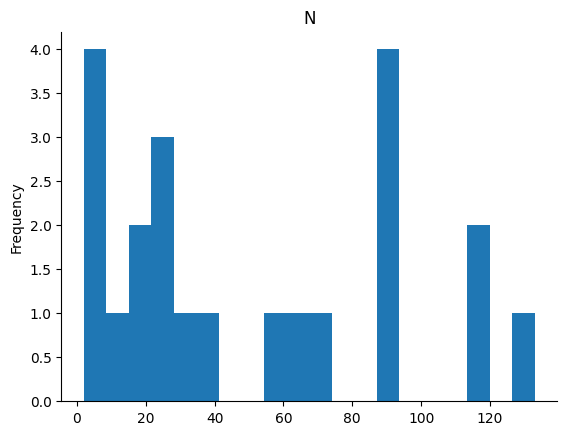

In [ ]:
# @title N

from matplotlib import pyplot as plt
unique_crops['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'papaya'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))

       N   P   K  temperature   humidity        ph   rainfall   label
1757  65  63  50    31.883426  91.325654  6.524459  79.272016  papaya


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'mungbean'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))


      N   P   K  temperature   humidity        ph   rainfall     label
673  14  37  15    27.962357  83.975868  6.581351  48.936695  mungbean


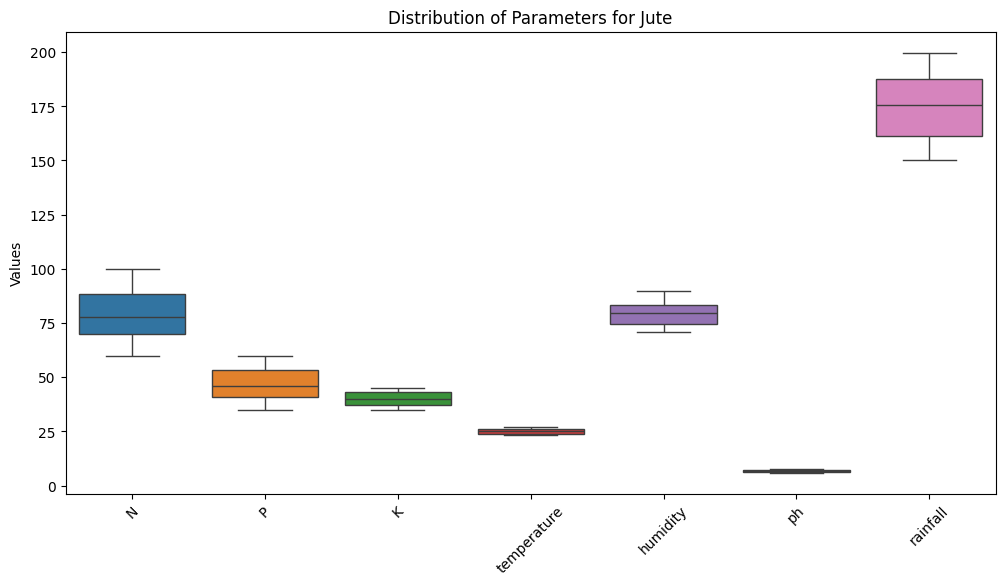

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Crop_recommendation.csv')

# Specify the crop you want to visualize
crop_name = 'jute'
# Filter the dataset for the specified crop
crop_data = data[data['label'] == crop_name]

# Drop the 'label' column for plotting purposes
parameters = crop_data.drop(columns=['label'])

# Plot each parameter as a boxplot to observe its distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=parameters)
plt.title(f'Distribution of Parameters for {crop_name.capitalize()}')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Crop_recommendation.csv')

# Specifying the crop that i want to display
crop_name = 'maize'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(5))

      N   P   K  temperature   humidity        ph    rainfall  label
172  86  37  16    20.517168  59.212355  5.561511   67.610137  maize
176  74  39  23    22.626511  65.774729  6.780736   88.172510  maize
147  74  58  18    20.037282  56.356068  6.727303  109.024141  maize
186  65  60  22    25.367684  72.520546  6.606984  107.912411  maize
122  74  56  22    18.283622  66.659528  6.829199   80.975733  maize


In [ ]:
# Displaying one sample row for each unique crop
unique_crops = data.drop_duplicates(subset='label')
unique_crops.head(len(unique_crops))

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
200,40,72,77,17.024985,16.988612,7.485996,88.551231,chickpea
300,13,60,25,17.136928,20.595417,5.685972,128.256862,kidneybeans
400,3,72,24,36.512684,57.928872,6.031608,122.653969,pigeonpeas
500,3,49,18,27.910952,64.709306,3.692864,32.678919,mothbeans
600,19,55,20,27.433294,87.805077,7.185301,54.733676,mungbean
700,56,79,15,29.484400,63.199153,7.454532,71.890907,blackgram
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil
900,2,24,38,24.559816,91.635362,5.922936,111.968462,pomegranate


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'maize'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))

      N   P   K  temperature   humidity        ph   rainfall  label
145  96  46  22     20.58314  69.001286  6.499936  66.293904  maize


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'papaya'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))

       N   P   K  temperature   humidity        ph    rainfall   label
1728  61  51  51      39.3005  94.161934  6.574678  120.951247  papaya


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'maize'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))

      N   P   K  temperature   humidity       ph    rainfall  label
157  77  58  19    22.805603  56.507689  5.79165  101.595279  maize


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'coffee'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))

       N   P   K  temperature  humidity        ph    rainfall   label
2129  84  39  35    23.177144  52.13864  6.959404  117.311356  coffee


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'papaya'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample(1))

       N   P   K  temperature   humidity        ph   rainfall   label
1753  49  54  50    25.624466  93.182403  6.762522  97.263367  papaya


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/Crop_recommendation.csv'  # Replace with the actual path in your Drive if different
data = pd.read_csv(data_path)

# Specifying the crop that i want to display
crop_name = 'mungbeans'  # Replace 'wheat' with the name of your chosen crop

# Filter the dataset to display only rows for the specified crop
crop_data = data[data['label'] == crop_name]

# Display the first few rows of data for the specified crop
print(crop_data.sample)

<bound method NDFrame.sample of Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []>


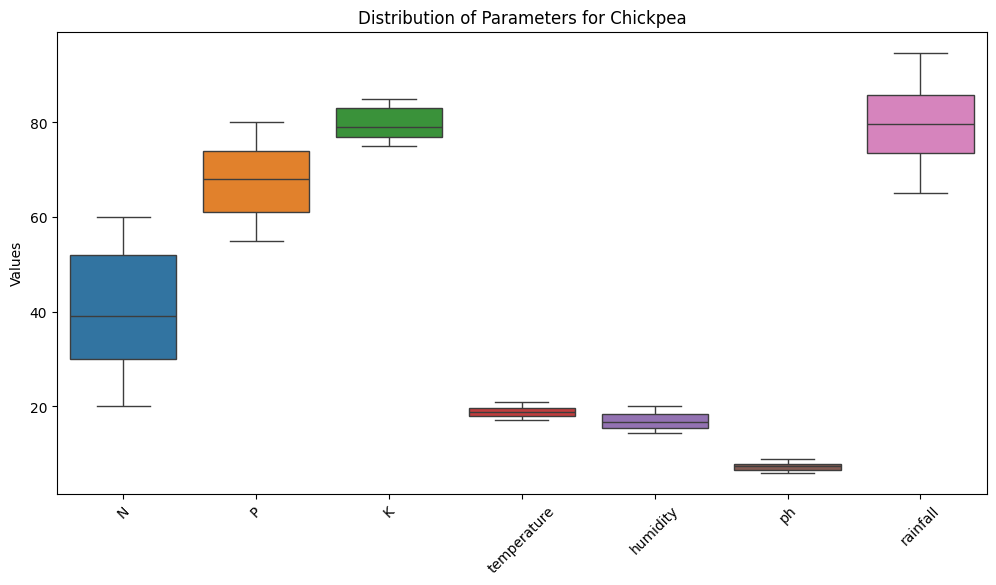

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Crop_recommendation.csv')

# Specify the crop you want to visualize
crop_name = 'chickpea'
# Filter the dataset for the specified crop
crop_data = data[data['label'] == crop_name]

# Drop the 'label' column for plotting purposes
parameters = crop_data.drop(columns=['label'])

# Plot each parameter as a boxplot to observe its distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=parameters)
plt.title(f'Distribution of Parameters for {crop_name.capitalize()}')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-e0a42c17ca97>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rainfall_data.values, y=rainfall_data.index, palette='viridis')


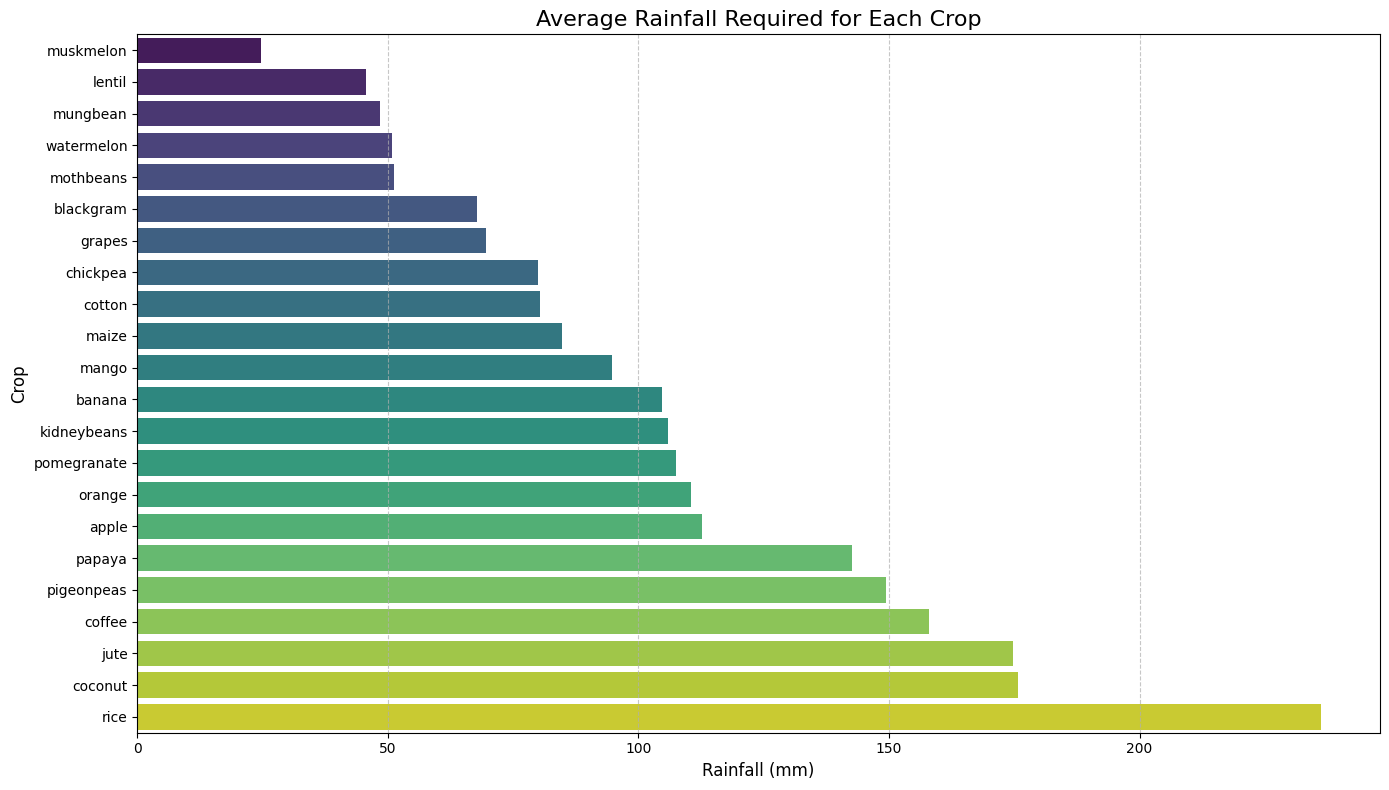

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by crop and calculate the average rainfall
rainfall_data = data.groupby('label')['rainfall'].mean().sort_values()

# Plot the average rainfall for each crop
plt.figure(figsize=(14, 8))
sns.barplot(x=rainfall_data.values, y=rainfall_data.index, palette='viridis')
plt.title('Average Rainfall Required for Each Crop', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Enter the name of the crop: maize
The average rainfall required for Maize is 84.77 mm.


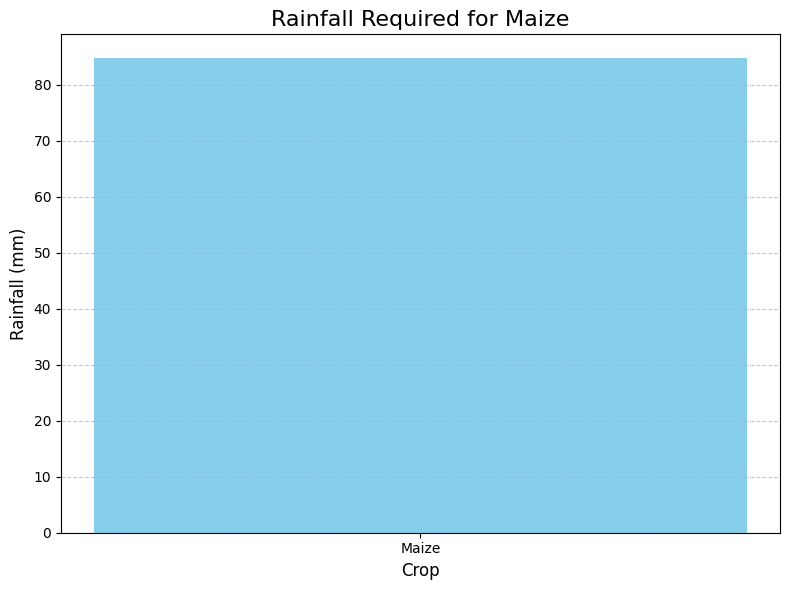

In [ ]:
# Input the crop name
crop_name = input("Enter the name of the crop: ").strip().lower()

# Check if the crop exists in the dataset
if crop_name in data['label'].str.lower().unique():
    # Filter data for the input crop
    crop_data = data[data['label'].str.lower() == crop_name]

    # Calculate the average rainfall for the crop
    avg_rainfall = crop_data['rainfall'].mean()

    print(f"The average rainfall required for {crop_name.capitalize()} is {avg_rainfall:.2f} mm.")

    # Plot rainfall for the specific crop
    plt.figure(figsize=(8, 6))
    plt.bar(crop_name.capitalize(), avg_rainfall, color='skyblue')
    plt.title(f'Rainfall Required for {crop_name.capitalize()}', fontsize=16)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    plt.xlabel('Crop', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print(f"The crop '{crop_name}' is not available in the dataset.")

